### **Univariate Linear Regression**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/4K_House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
data.shape

(4746, 12)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
X = data['Size']
Y = data['Rent']

In [7]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

In [8]:
A = 0
B = 0
for i in range(len(X)):
  A += (X[i] - mean_X) * (Y[i] - mean_Y)
  B += (X[i] - mean_X) ** 2

m = A / B
c = mean_Y - (m * mean_X)

print(m, c)

50.93164261814116 -14282.440720140658


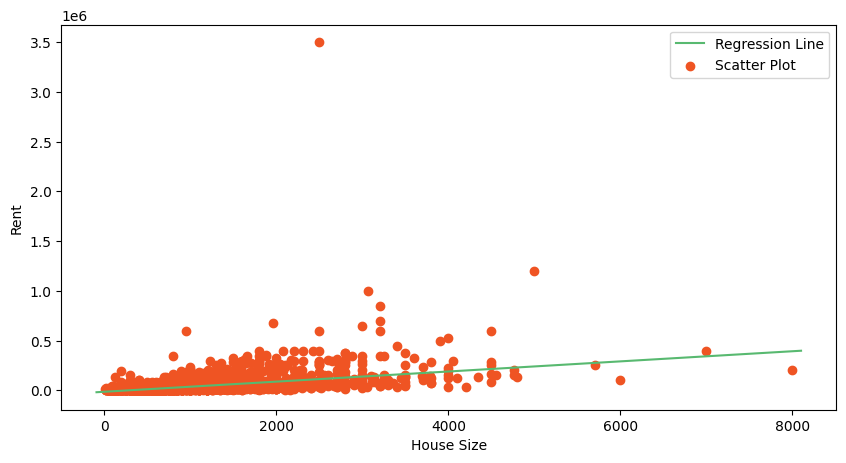

In [9]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = m * x + c

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c = "#ef5423", label = 'Scatter Plot')

plt.xlabel('House Size')
plt.ylabel('Rent')
plt.legend()
plt.show()

### **Gradient Descent**


34468.52806904109 0.5425615384615384


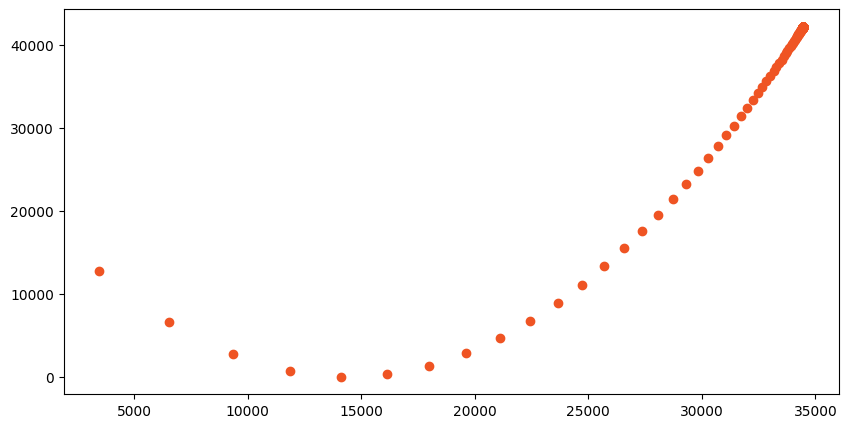

In [10]:
thetas = []
costs = []

m = len(X)
epoch = 1000
# learning_rate_1 = 0.0000001
learning_rate = 0.1
theta_0 = 0
theta_1 = 0.5425615384615384

for i in range(epoch):
  temp_0 = 0
  temp_1 = 0
  for j in range(m):
    temp_0 += (theta_0 + theta_1*X[j] - Y[j])
    # temp_1 += (theta_0 + theta_1*X[j] - Y[j]) * X[j]

  theta_0 = theta_0 - learning_rate * (temp_0) / m
  # theta_1 = theta_1 - learning_rate_1 * (temp_1) / m

  #print('Theta 0 : ' , theta_0)

  thetas.append(theta_0)
  sum = 0
  for k in range(m):
    sum_ = (theta_0 + theta_1*X[k] - Y[k]) * ((theta_0 + theta_1*X[k] - Y[k]))
  cost = sum_ / (2 * m)
  costs.append(cost)

  # print('Theta 0 : ' , theta_0)
  # print('Theta 1 : ' ,theta_1)

print(theta_0, theta_1)

plt.scatter(thetas, costs, c = "#ef5423", label = 'Scatter Plot')
plt.show()

#Contour Plot

<ipython-input-14-d5f2e99ad62f>:30: RuntimeWarning: overflow encountered in double_scalars
  sum_ += (theta_0 + theta_1*X[k] - Y[k])**2
<ipython-input-14-d5f2e99ad62f>:21: RuntimeWarning: overflow encountered in double_scalars
  temp_1 += error * X[j]
<ipython-input-14-d5f2e99ad62f>:24: RuntimeWarning: invalid value encountered in double_scalars
  theta_1 = theta_1 - learning_rate * temp_1 / m


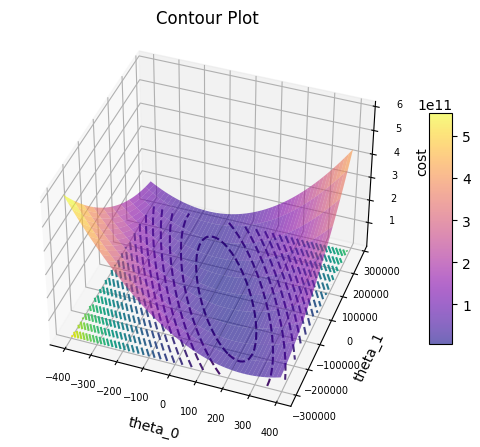

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Modified code for gradient descent
thetas = []
costs = []

m = len(X)
epoch = 1000
learning_rate = 0.1
theta_0 = 0
theta_1 = 0.5425615384615384

for i in range(epoch):
    temp_0 = 0
    temp_1 = 0
    for j in range(m):
        error = (theta_0 + theta_1*X[j] - Y[j])
        temp_0 += error
        temp_1 += error * X[j]

    theta_0 = theta_0 - learning_rate * temp_0 / m
    theta_1 = theta_1 - learning_rate * temp_1 / m

    thetas.append([theta_0, theta_1])

    sum_ = 0
    for k in range(m):
        sum_ += (theta_0 + theta_1*X[k] - Y[k])**2
    cost = sum_ / (2 * m)
    costs.append(cost)

thetas = np.array(thetas)

def loss(a, b):
    return 1/len(X)*(np.sum((a*X + b - Y)**2))

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1, projection="3d")

a = np.arange(-400, 400, 5)
b = np.arange(-300000, 300000, 20000)
A, B = np.meshgrid(a, b)

zs = np.array([loss(a, b) for a, b in zip(np.ravel(A), np.ravel(B))])
loss_vals = zs.reshape(A.shape)

surf = ax.plot_surface(A, B, loss_vals, cmap="plasma", rstride=3, cstride=3, edgecolor='none', alpha=0.6)

contour = ax.contour(A, B, loss_vals, 30, cmap="viridis", linestyles="dashed", offset=0)

ax.view_init(40, 290)

ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('cost', rotation="vertical")
ax.set_title('Contour Plot')

plt.tick_params(axis='both', which='major', labelsize=7)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.show()

In [15]:
data


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [16]:
data.drop(['Posted On','Floor','Area Locality','City','Tenant Preferred','Point of Contact'],axis='columns',inplace=True)
data

,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom
0,2,10000,1100,Super Area,Unfurnished,2
1,2,20000,800,Super Area,Semi-Furnished,1
2,2,17000,1000,Super Area,Semi-Furnished,1
3,2,10000,800,Super Area,Unfurnished,1
4,2,7500,850,Carpet Area,Unfurnished,1
...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Semi-Furnished,2
4742,3,29000,2000,Super Area,Semi-Furnished,3
4743,3,35000,1750,Carpet Area,Semi-Furnished,3
4744,3,45000,1500,Carpet Area,Semi-Furnished,2


In [18]:
data['Area Type'].replace({'Built Area': 0, 'Carpet Area' : 1, 'Super Area' : 2},inplace=True)
data['Furnishing Status'].replace({'Unfurnished' : 0,'Semi-Furnished' : 1, 'Furnished': 2},inplace=True)

In [21]:
pip install scikit-learn


In [25]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()

column_to_scale = ['Size']
data[column_to_scale] = scaler.fit_transform(data[column_to_scale])

total_column = len(data)
x = data.drop('Rent', axis='columns')
y = data['Rent']
x = np.hstack((np.ones((total_column, 1)), x))


In [24]:
theta = np.zeros(6)
thetas = []
epoch = 30000;
alpha = 0.1;
cost = 0
costs = []

for i in range(epoch):
  predicted_rent = x.dot(theta)
  errors = np.subtract(predicted_rent, y)
  theta = theta - ((alpha/total_column) * x.T.dot(errors))
  thetas.append(theta)
  cost = 1 / (2*total_column) * np.sum(np.square(errors))
  costs.append(cost)

print('Thetas = ',theta)
print('Cost = ',cost)

Thetas =  [  -839.64975641  -2303.84810102 209366.41118617 -23386.99361181
   6427.37114078  23442.2934393 ]
Cost =  2328402258.368509


#3D Scatter Plot

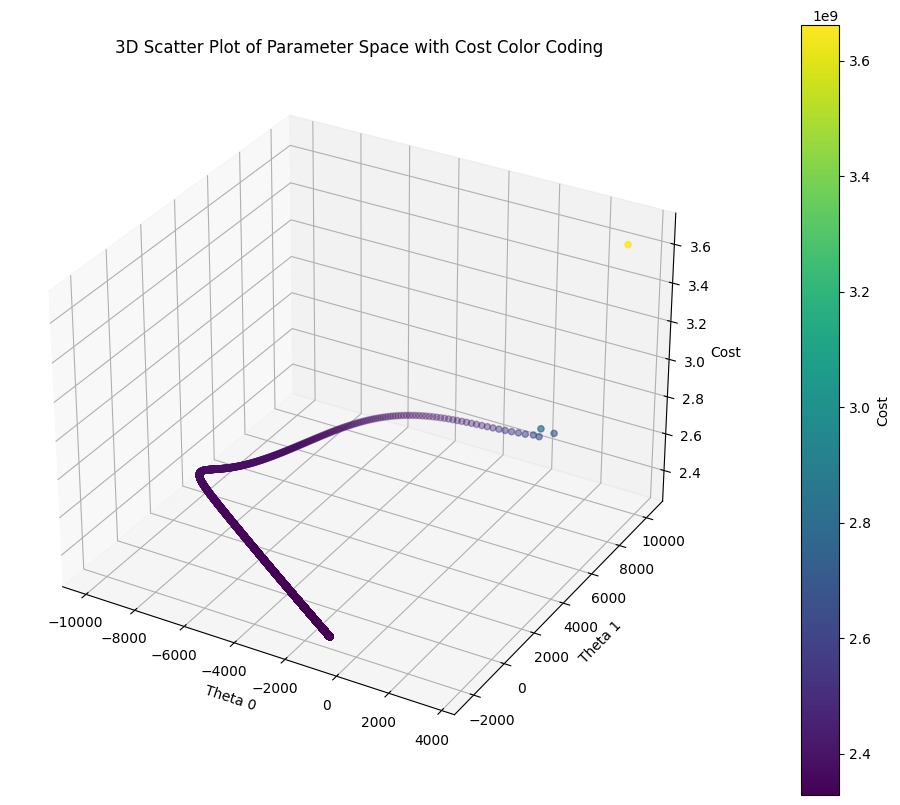

In [26]:
from mpl_toolkits.mplot3d import Axes3D

thetas = np.array(thetas)
costs = np.array(costs)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter_plot = ax.scatter(thetas[:, 0], thetas[:, 1], costs, c=costs, cmap='viridis', marker='o')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')
ax.set_title('3D Scatter Plot of Parameter Space with Cost Color Coding')

cbar = fig.colorbar(scatter_plot, ax=ax, pad=0.1)
cbar.set_label('Cost')

plt.show()

#Contour Plot

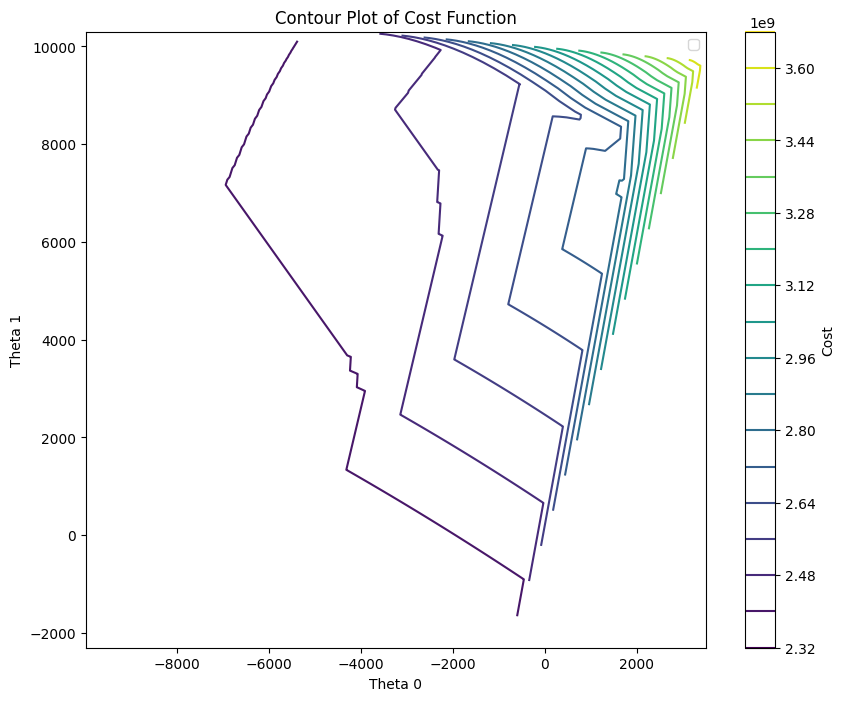

In [27]:
from matplotlib.tri import Triangulation

min_cost_index = np.argmin(costs)

triang = Triangulation(thetas[:, 0], thetas[:, 1])

plt.figure(figsize=(10, 8))
contour_plot = plt.tricontour(triang, costs, levels=20, cmap='viridis')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.title('Contour Plot of Cost Function')
plt.legend()
plt.colorbar(contour_plot, label='Cost')

plt.show()

## **Normal Equation (using the Dataset used in 1st section : Univariate Linear Regression:)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

In [ ]:
X = np.array([[1, 2000], [1, 2100], [1, 1100], [1, 2200], [1, 1000]])
S = np.matmul(X.T, X)
S

In [ ]:
Y = np.array([[810], [907], [312], [950], [301]])
P = np.matmul(X.T, Y)
P

In [ ]:
from numpy.linalg import inv
S = inv(S)
S

In [ ]:
theta = np.matmul(S, P)

In [ ]:
theta